In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
all_files = glob.glob(r"./furtos/*")
df = pd.concat((pd.read_csv(f, sep='\t', encoding='UTF-16 LE') for f in all_files), ignore_index=True)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27258 entries, 0 to 27257
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ano_bo                    27258 non-null  int64  
 1   num_bo                    27258 non-null  int64  
 2   numero_boletim            27258 non-null  object 
 3   bo_iniciado               27258 non-null  object 
 4   bo_emitido                27258 non-null  object 
 5   dataocorrencia            27258 non-null  object 
 6   horaocorrencia            21584 non-null  object 
 7   peridoocorrencia          27258 non-null  object 
 8   datacomunicacao           27258 non-null  object 
 9   dataelaboracao            27258 non-null  object 
 10  bo_autoria                27258 non-null  object 
 11  flagrante                 27258 non-null  object 
 12  numero_boletim_principal  2077 non-null   object 
 13  logradouro                24531 non-null  object 
 14  numero

In [6]:
df["descr_tipo_veiculo"].unique()

array(['AUTOMOVEL', 'CAMINHONETE', 'MOTOCICLO', nan, 'MOTONETA',
       'CAMIONETA', 'MICRO-ONIBUS', 'UTILITÁRIO', 'CAMINHÃO', 'INEXIST.',
       'Não Informado', 'REBOQUE', 'CAMINHÃO TRATOR', 'TRATOR RODAS',
       'CICLOMOTO', 'SEMI-REBOQUE', 'ONIBUS', 'TRATOR MISTO'],
      dtype=object)

In [7]:
furtos = df[["dataocorrencia", "horaocorrencia", "cidade", "bairro", "logradouro", "descr_tipo_veiculo"]]

In [8]:
furtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27258 entries, 0 to 27257
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dataocorrencia      27258 non-null  object
 1   horaocorrencia      21584 non-null  object
 2   cidade              27228 non-null  object
 3   bairro              27191 non-null  object
 4   logradouro          24531 non-null  object
 5   descr_tipo_veiculo  23882 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


<AxesSubplot:>

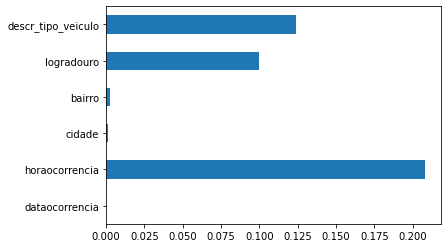

In [9]:
furtos.isnull().mean().plot(kind="barh")

In [10]:
furtos.dropna(inplace=True)

In [11]:
furtos.shape

(17784, 6)

In [12]:
furtos["data_hora"] = pd.to_datetime(furtos["dataocorrencia"]+" "+furtos["horaocorrencia"])

In [13]:
furtos["cidade"].unique()[:10]

array(['S.PAULO', 'LIMEIRA', 'BIRIGUI', 'GUARULHOS', 'COSMOPOLIS',
       'ITANHAEM', 'PRAIA GRANDE', 'S.CARLOS', 'JARDINOPOLIS',
       'S.JOSE DO RIO PRETO'], dtype=object)

In [14]:
furtos['bairro'].unique()

array(['RECANTO CAMPO BELO', 'VILA CLAUDIA', 'CHACARAS CAICARA', ...,
       'JARDIM BOTÂNICO', 'JARDIM MIZAEL',
       'RESIDENCIAL CAVALARI (ZONA RURAL)'], dtype=object)

In [15]:
furtos['bairro'] = furtos['bairro'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [16]:
furtos['bairro'] = furtos['bairro'].str.replace(r'\(.*', '', regex=True).str.strip()

In [17]:
furtos['logradouro'].unique()

array(['RUA CARLOS JORGE SCHMIDT', 'AVENIDA ANTÔNIO OMETO',
       'RUA BENJAMIN STROZI', ..., 'RUA MENA', 'RUA FERNANDO DE NORONHA',
       'RUA MILTON VARGAS DA SILVA'], dtype=object)

In [18]:
furtos['logradouro'] = furtos['logradouro'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [19]:
furtos[furtos['logradouro'].str.contains('\(')]

,dataocorrencia,horaocorrencia,cidade,bairro,logradouro,descr_tipo_veiculo,data_hora
4406,15/01/2020,16:20,GUARULHOS,ITAPEGICA,RODOVIA PRESIDENTE DUTRA (BR 116),AUTOMOVEL,2020-01-15 16:20:00
8785,27/01/2020,22:30,BARRETOS,CENTRO,RUA DEZOITO (NUMERACAO COM ZERO INICIAL),MOTOCICLO,2020-01-27 22:30:00
8956,28/01/2020,19:40,BARRETOS,SUMARE,RUA TRINTA E QUATRO (NUMERACAO COM ZERO,MOTOCICLO,2020-01-28 19:40:00
11628,27/01/2020,22:30,BARRETOS,CENTRO,RUA DEZOITO (NUMERACAO COM ZERO INICIAL),MOTOCICLO,2020-01-27 22:30:00
16351,31/01/2020,19:10,GUARULHOS,ITAPEGICA,RODOVIA PRESIDENTE DUTRA (BR 116),MOTOCICLO,2020-01-31 19:10:00
16353,31/01/2020,19:10,GUARULHOS,ITAPEGICA,RODOVIA PRESIDENTE DUTRA (BR 116),MOTOCICLO,2020-01-31 19:10:00
16355,31/01/2020,19:10,GUARULHOS,ITAPEGICA,RODOVIA PRESIDENTE DUTRA (BR 116),MOTOCICLO,2020-01-31 19:10:00
19259,29/02/2020,21:45,BARRETOS,MARILIA,AVENIDA QUARENTA E NOVE (NUMERACAO COM Z,MOTOCICLO,2020-02-29 21:45:00
19322,01/03/2020,06:55,ITAPEVA,RURAL,RUA AUGUSTO BATISTA DO CANTO (TECO),AUTOMOVEL,2020-01-03 06:55:00
20654,05/03/2020,13:30,MOGI GUACU,JARDIM NOVO II,RUA ANTONIO ORTIZ ( LOLO),MOTOCICLO,2020-05-03 13:30:00


In [20]:
furtos['logradouro'] = furtos['logradouro'].str.replace(r'\(.*', '', regex=True).str.strip()

In [21]:
furtos['descr_tipo_veiculo'].unique()

array(['AUTOMOVEL', 'MOTOCICLO', 'MOTONETA', 'CAMIONETA', 'MICRO-ONIBUS',
       'UTILITÁRIO', 'CAMINHÃO', 'INEXIST.', 'CAMINHONETE',
       'Não Informado', 'CICLOMOTO', 'TRATOR RODAS', 'TRATOR MISTO',
       'ONIBUS', 'REBOQUE', 'CAMINHÃO TRATOR', 'SEMI-REBOQUE'],
      dtype=object)

In [22]:
furtos['descr_tipo_veiculo'] = furtos['descr_tipo_veiculo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [23]:
furtos['descr_tipo_veiculo'].unique()

array(['AUTOMOVEL', 'MOTOCICLO', 'MOTONETA', 'CAMIONETA', 'MICRO-ONIBUS',
       'UTILITARIO', 'CAMINHAO', 'INEXIST.', 'CAMINHONETE',
       'Nao Informado', 'CICLOMOTO', 'TRATOR RODAS', 'TRATOR MISTO',
       'ONIBUS', 'REBOQUE', 'CAMINHAO TRATOR', 'SEMI-REBOQUE'],
      dtype=object)

<AxesSubplot:>

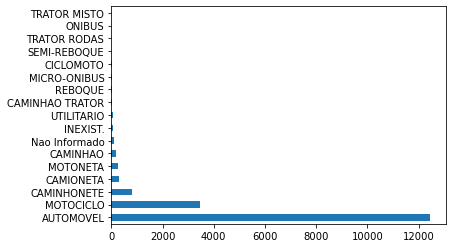

In [24]:
furtos['descr_tipo_veiculo'].value_counts().plot(kind='barh')

In [25]:
furtos['descr_tipo_veiculo'] = furtos['descr_tipo_veiculo'].replace(
    {'Nao Informado': np.NaN, 'INEXIST.': np.NaN, 'SEMI-REBOQUE': 'REBOQUE', 
     'CAMINHAO TRATOR': 'TRATOR', 'TRATOR RODAS': 'TRATOR', 'TRATOR MISTO': 'TRATOR',
     'MICRO-ONIBUS': 'ONIBUS', 'CICLOMOTO': 'MOTOCICLO'
})

<AxesSubplot:>

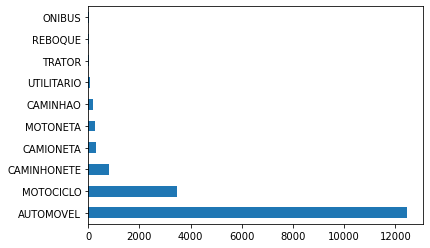

In [26]:
furtos['descr_tipo_veiculo'].value_counts().plot(kind='barh')

In [27]:
furtos.dropna(inplace=True)

In [28]:
furtos['ano'] = furtos['data_hora'].dt.year
furtos['mes'] = furtos['data_hora'].dt.month
furtos['dia'] = furtos['data_hora'].dt.day
furtos['dia_semana'] = furtos['data_hora'].dt.weekday
furtos['estacao'] = (furtos['data_hora'].dt.month - 1) // 3

In [29]:
furtos = furtos[furtos['ano'] == 2020]

In [30]:
furtos.drop(columns=['dataocorrencia', 'horaocorrencia', 'data_hora', 'ano'], inplace=True)

In [31]:
furtos.head()

,cidade,bairro,logradouro,descr_tipo_veiculo,mes,dia,dia_semana,estacao
3,LIMEIRA,VILA CLAUDIA,AVENIDA ANTONIO OMETO,AUTOMOVEL,1,1,2,0
4,BIRIGUI,CHACARAS CAICARA,RUA BENJAMIN STROZI,AUTOMOVEL,1,1,2,0
5,BIRIGUI,JARDIM VITRINE,RUA SILVIO VIEIRA COELHO,AUTOMOVEL,1,1,2,0
18,PRAIA GRANDE,SOLEMAR II,AVENIDA MINISTRO MARCOS FREIRE,MOTOCICLO,1,1,2,0
20,PRAIA GRANDE,SOLEMAR II,AVENIDA MINISTRO MARCOS FREIRE,MOTOCICLO,1,1,2,0


<AxesSubplot:>

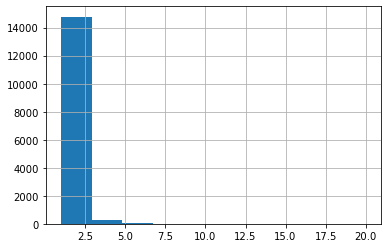

In [32]:
furtos.groupby(list(furtos.columns)).size().hist()

<AxesSubplot:>

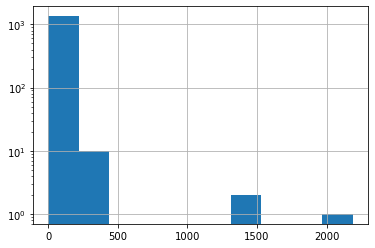

In [33]:
furtos_cidade = furtos.groupby(['cidade', 'mes', 'estacao']).size().reset_index()
furtos_cidade[0].hist(log=True)

In [34]:
furtos_cidade

,cidade,mes,estacao,0
0,ADAMANTINA,1,0,1
1,ADAMANTINA,2,0,2
2,ADAMANTINA,3,0,1
3,AGUAI,3,0,1
4,AGUAS DE LINDOIA,1,0,1
...,...,...,...,...
1357,VOTORANTIM,5,1,2
1358,VOTORANTIM,7,2,1
1359,VOTUPORANGA,2,0,3
1360,VOTUPORANGA,3,0,4


<AxesSubplot:>

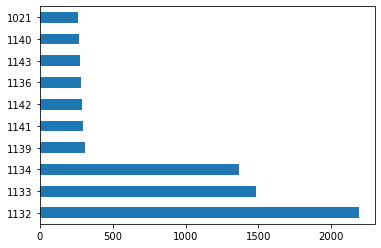

In [35]:
furtos_cidade[0].sort_values(ascending=False).head(10).plot(kind='barh')

<AxesSubplot:>

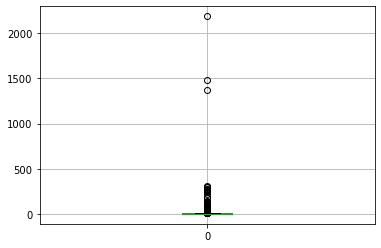

In [36]:
furtos_cidade.boxplot(0)

<AxesSubplot:>

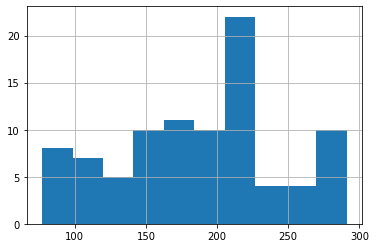

In [37]:
furtos_diames = furtos.groupby(['dia', 'mes', 'estacao', 'dia_semana']).size().reset_index()
furtos_diames[0].hist()

<AxesSubplot:>

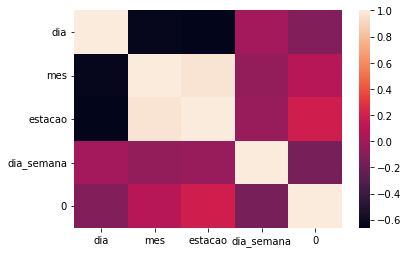

In [38]:
sns.heatmap(furtos_diames.corr())

<AxesSubplot:xlabel='dia'>

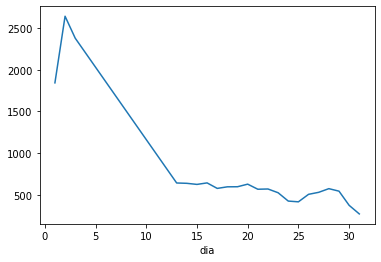

In [39]:
furtos_diames.groupby('dia')[0].sum().plot()

<AxesSubplot:xlabel='mes'>

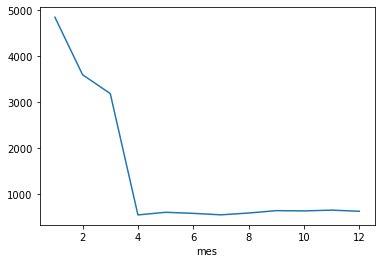

In [40]:
furtos_diames.groupby('mes')[0].sum().plot()

In [57]:
furtos_cidade = furtos.groupby(['cidade', 'mes', 'dia', 'dia_semana', 'estacao']).size().reset_index()

In [58]:
X = furtos_cidade.drop(0, axis=1)
y = furtos_cidade[0]

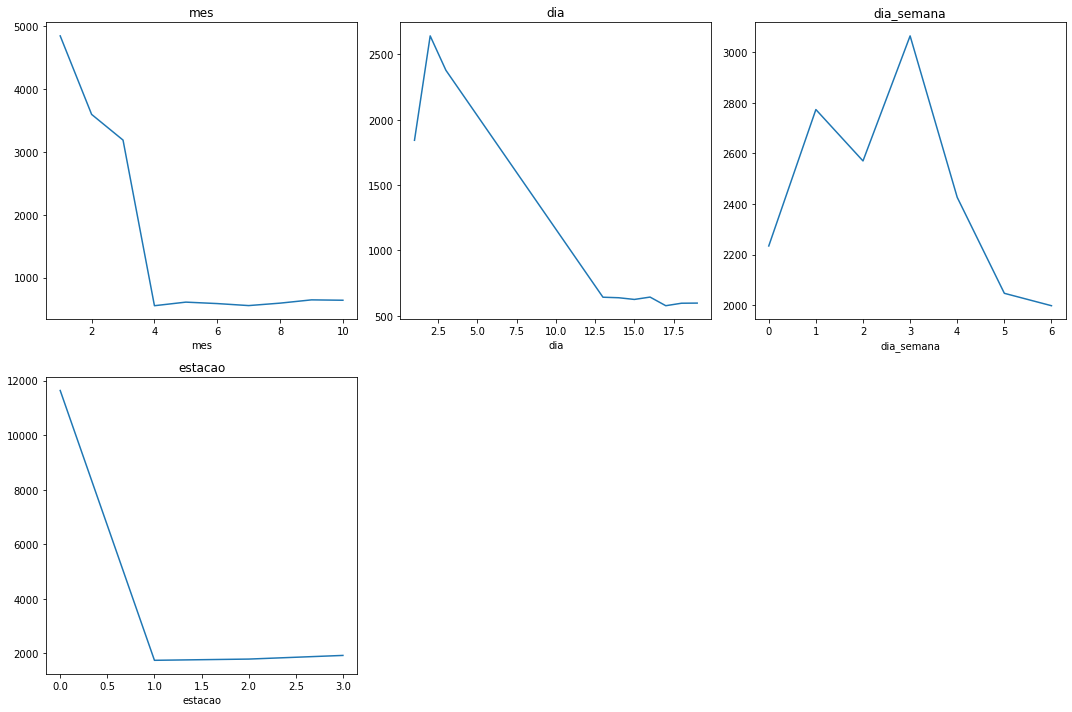

In [72]:
feat = X.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
for i, f in enumerate(feat):
    plt.subplot(2, 3, i+1)
    plt.title(f)
    furtos_cidade.groupby(f)[0].sum().head(10).plot()
plt.tight_layout()

In [81]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [73]:
regressor = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=100)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
encoder = OneHotEncoder(drop='first')
preprocessing = ColumnTransformer(transformers=[
    ('cat', encoder, ['cidade'])
], remainder='passthrough')

In [83]:
pipeline = make_pipeline(preprocessing, regressor)

In [84]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cidade'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=2, min_samples_leaf=100))])

In [86]:
train_score = pipeline.score(X_train, y_train)
#test_score = pipeline.score(X_test, y_test)

In [87]:
print(train_score)

0.0013059805703165006


[Text(0.5, 0.8333333333333334, 'x[298] <= 15.5\nsquared_error = 163.493\nsamples = 3174\nvalue = 4.073'),
 Text(0.25, 0.5, 'x[298] <= 1.5\nsquared_error = 183.543\nsamples = 1590\nvalue = 4.353'),
 Text(0.125, 0.16666666666666666, 'squared_error = 136.061\nsamples = 389\nvalue = 3.794'),
 Text(0.375, 0.16666666666666666, 'squared_error = 198.788\nsamples = 1201\nvalue = 4.535'),
 Text(0.75, 0.5, 'x[297] <= 1.5\nsquared_error = 143.209\nsamples = 1584\nvalue = 3.792'),
 Text(0.625, 0.16666666666666666, 'squared_error = 209.774\nsamples = 607\nvalue = 4.313'),
 Text(0.875, 0.16666666666666666, 'squared_error = 101.58\nsamples = 977\nvalue = 3.469')]

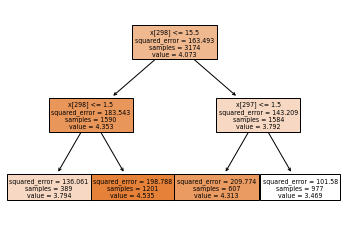

In [88]:
tree.plot_tree(regressor, filled=True)

In [89]:
y_pred = pipeline.predict(X_train)

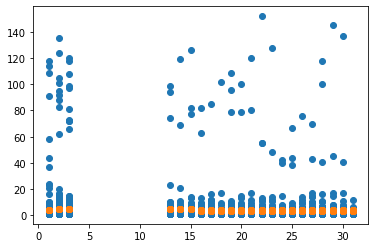

In [97]:
plt.scatter(X_train['dia'], y_train)
plt.scatter(X_train['dia'], y_pred, alpha=.7)